1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

2. Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/sahraazlqdh/my-datasets/main/insurance.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Output kode di atas memberikan informasi sebagai berikut:

- Ada 1.228 baris (records atau jumlah pengamatan) dalam dataset.
- Terdapat 7 kolom yaitu: age, sex, bmi, children, smoker, region, charges

3. Initial Exploration

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Dari output terlihat bahwa:

Terdapat 3 kolom dengan tipe object, yaitu: sex, smoker, dan region. Kolom ini merupakan categorical features (fitur non-numerik).
Terdapat 2 kolom numerik dengan tipe data float64 yaitu: bmi dan charges. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
Terdapat 2 kolom numerik dengan tipe data int64, yaitu: age dan children. Kolom ini merupakan target fitur kita.

In [4]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

4. Boxplots for Outlier Detection

<Axes: xlabel='age'>

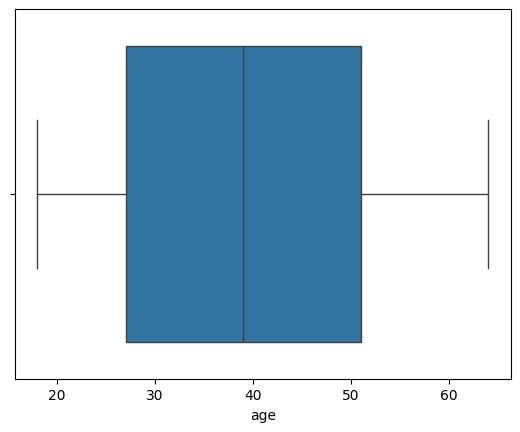

In [5]:
sns.boxplot(x=df['age'])

<Axes: xlabel='bmi'>

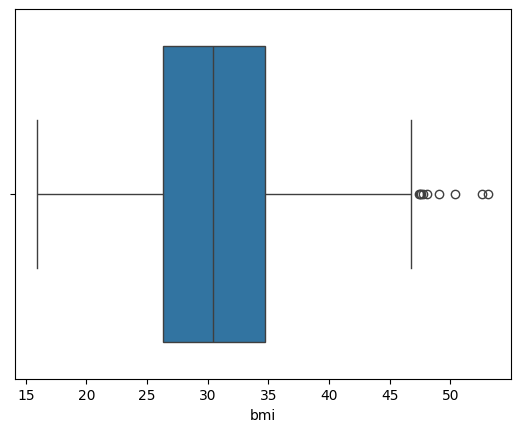

In [6]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='children'>

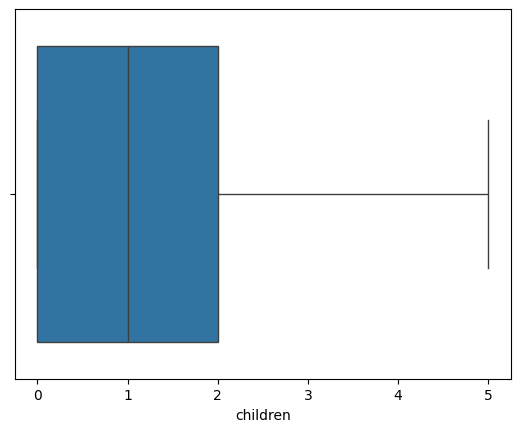

In [7]:
sns.boxplot(x=df['children'])

<Axes: xlabel='children'>

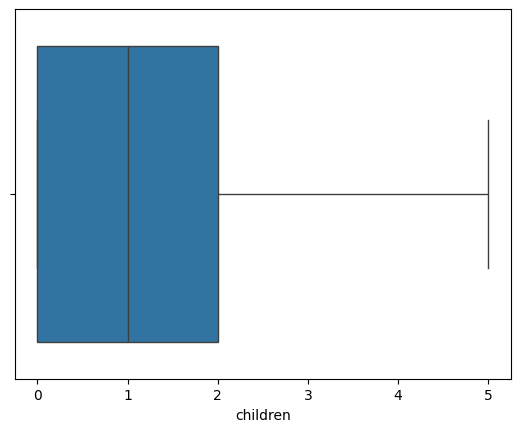

In [8]:
sns.boxplot(x=df['children'])

5. Outlier Removal (for 'bmi')

In [9]:
for col in ['bmi']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

print("Setelah hapus outlier (bmi):", df.shape)

Setelah hapus outlier (bmi): (1329, 7)


Dataset sekarang telah bersih dan memiliki 1.329 sampel.

6. Categorical Feature Distribution

        jumlah sampel  persentase
sex                              
male              670        50.4
female            659        49.6


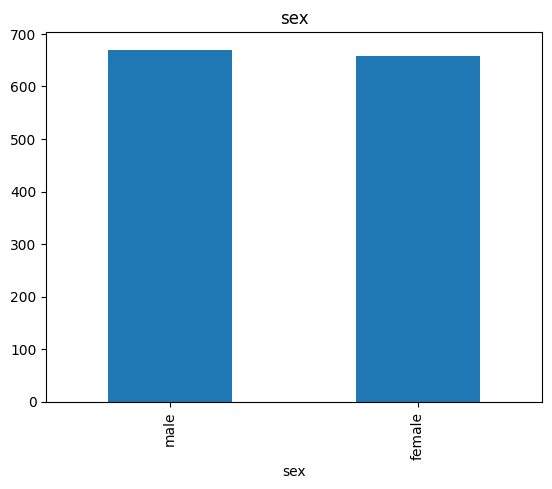

In [10]:
feature = 'sex'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_sex = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_sex)
count.plot(kind='bar', title=feature)
plt.show()

        jumlah sampel  persentase
smoker                           
no               1058        79.6
yes               271        20.4


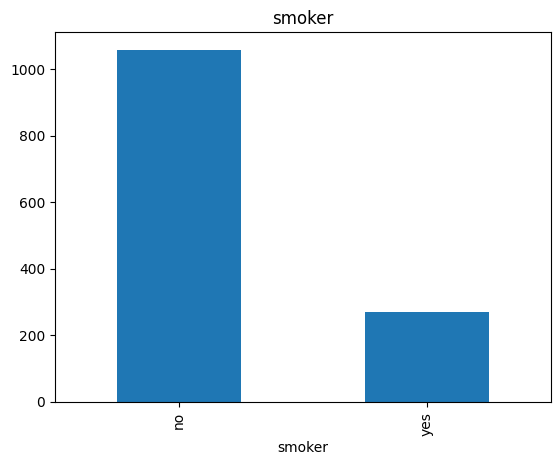

In [11]:
feature = 'smoker'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_smoker = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_smoker)
count.plot(kind='bar', title=feature)
plt.show()

           jumlah sampel  persentase
region                              
southeast            357        26.9
northwest            325        24.5
southwest            324        24.4
northeast            323        24.3


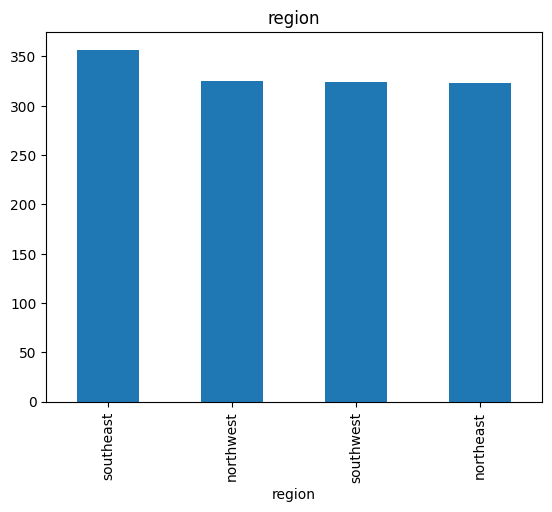

In [12]:
feature = 'region'
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_region = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df_region)
count.plot(kind='bar', title=feature)
plt.show()

Rata-rata 'charges' berdasarkan fitur kategori

<ipython-input-13-4c7263ea2e8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height=4, aspect=2.5, data=df, palette="Set3")


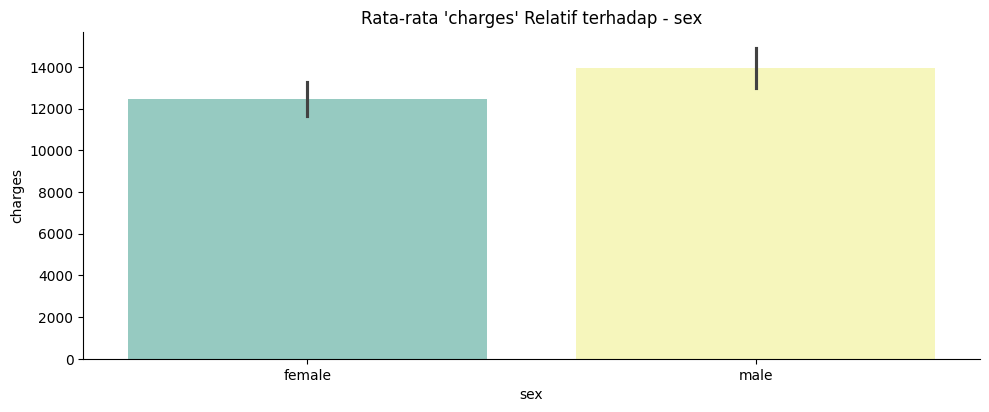

<ipython-input-13-4c7263ea2e8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height=4, aspect=2.5, data=df, palette="Set3")


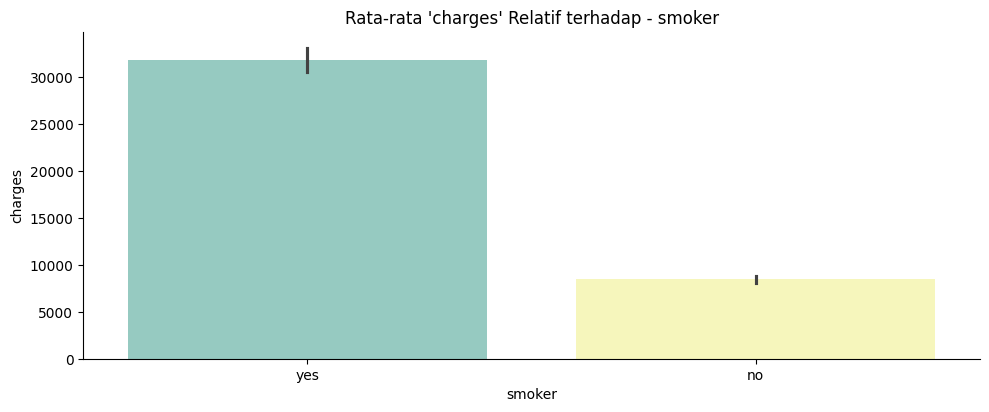

<ipython-input-13-4c7263ea2e8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height=4, aspect=2.5, data=df, palette="Set3")


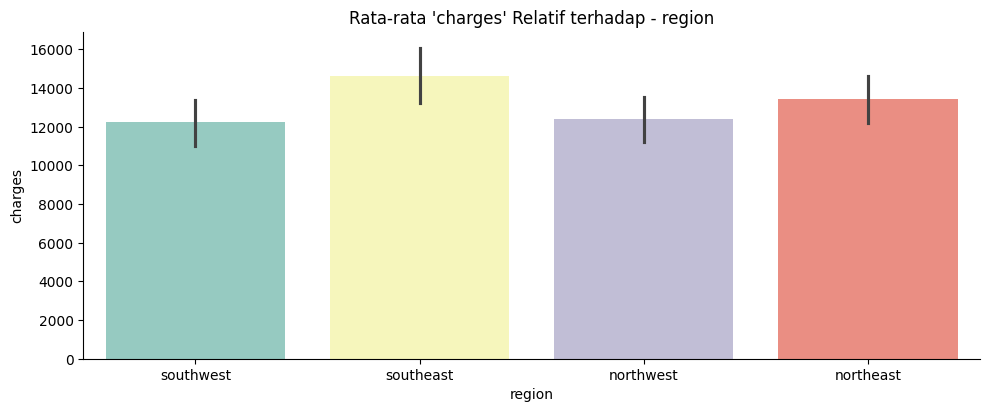

In [13]:
cat_features = ['sex', 'smoker', 'region']
for col in cat_features:
    sns.catplot(x=col, y="charges", kind="bar", dodge=False, height=4, aspect=2.5, data=df, palette="Set3")
    plt.title(f"Rata-rata 'charges' Relatif terhadap - {col}")
    plt.show()

7. Histogram & Correlation Matrix

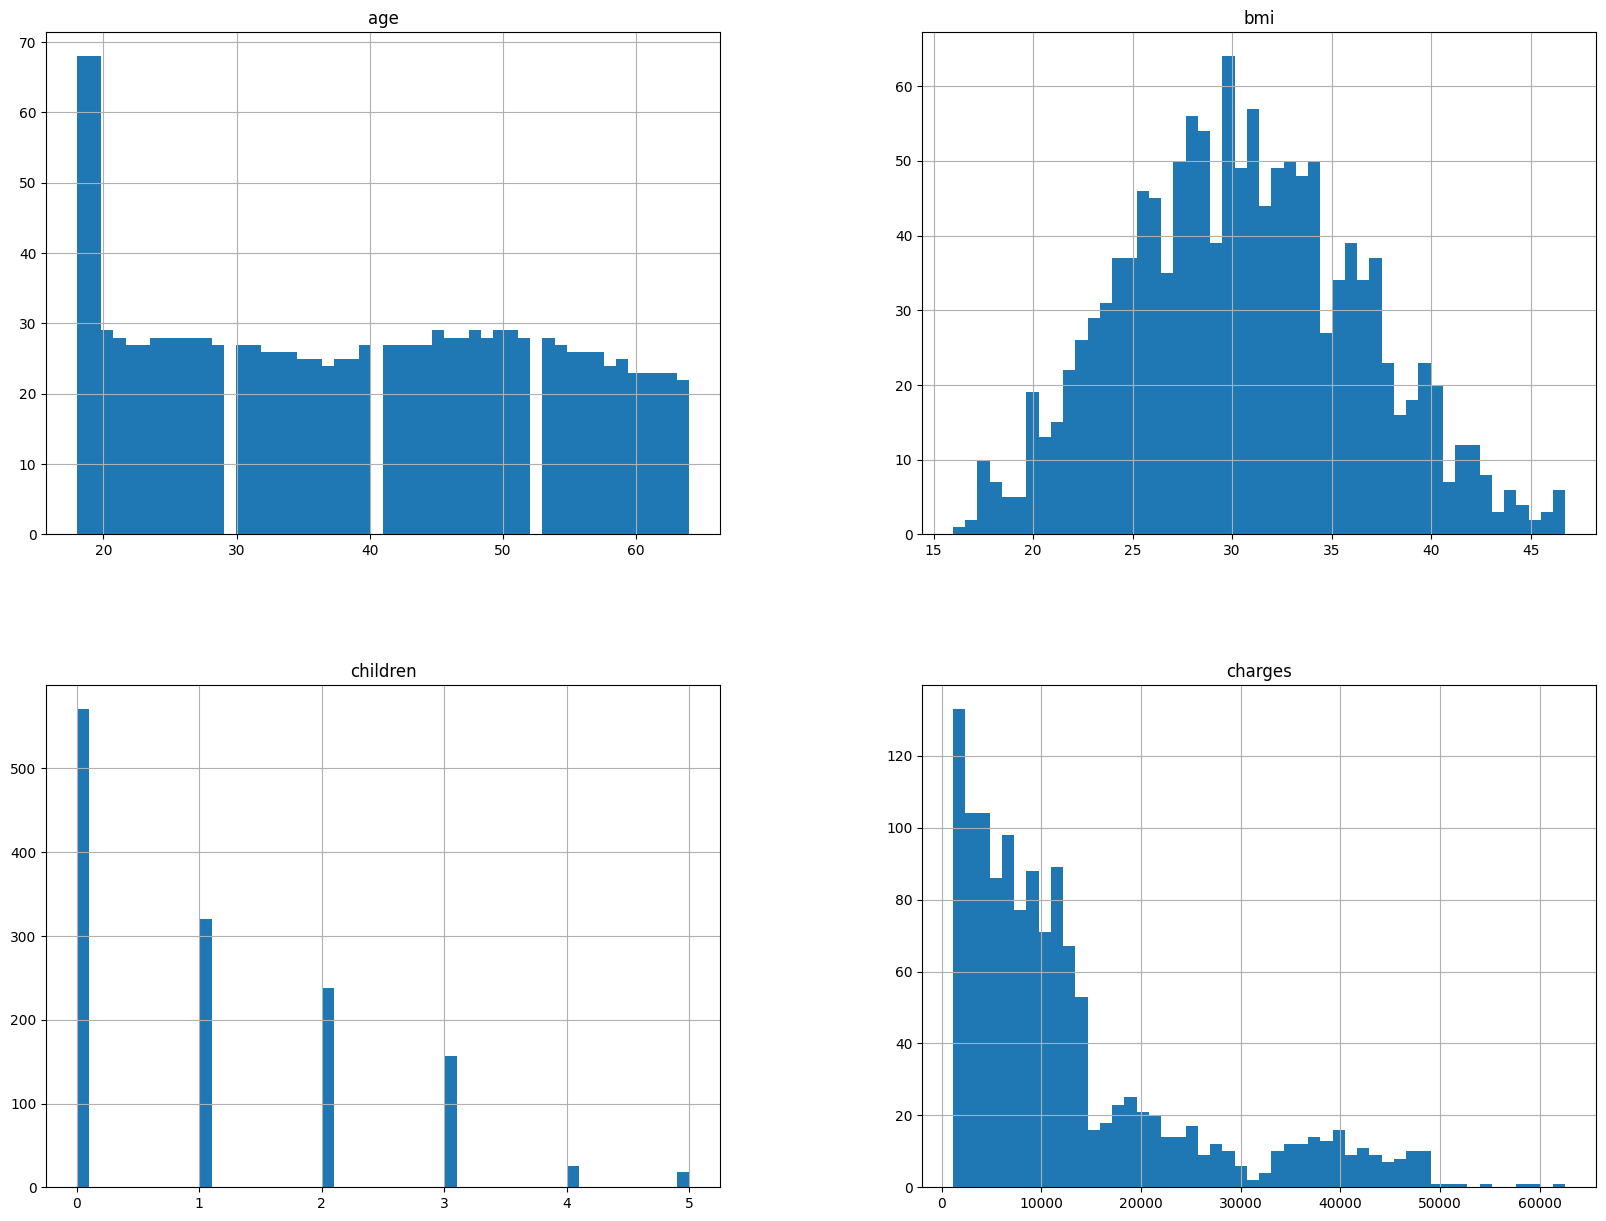

In [14]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

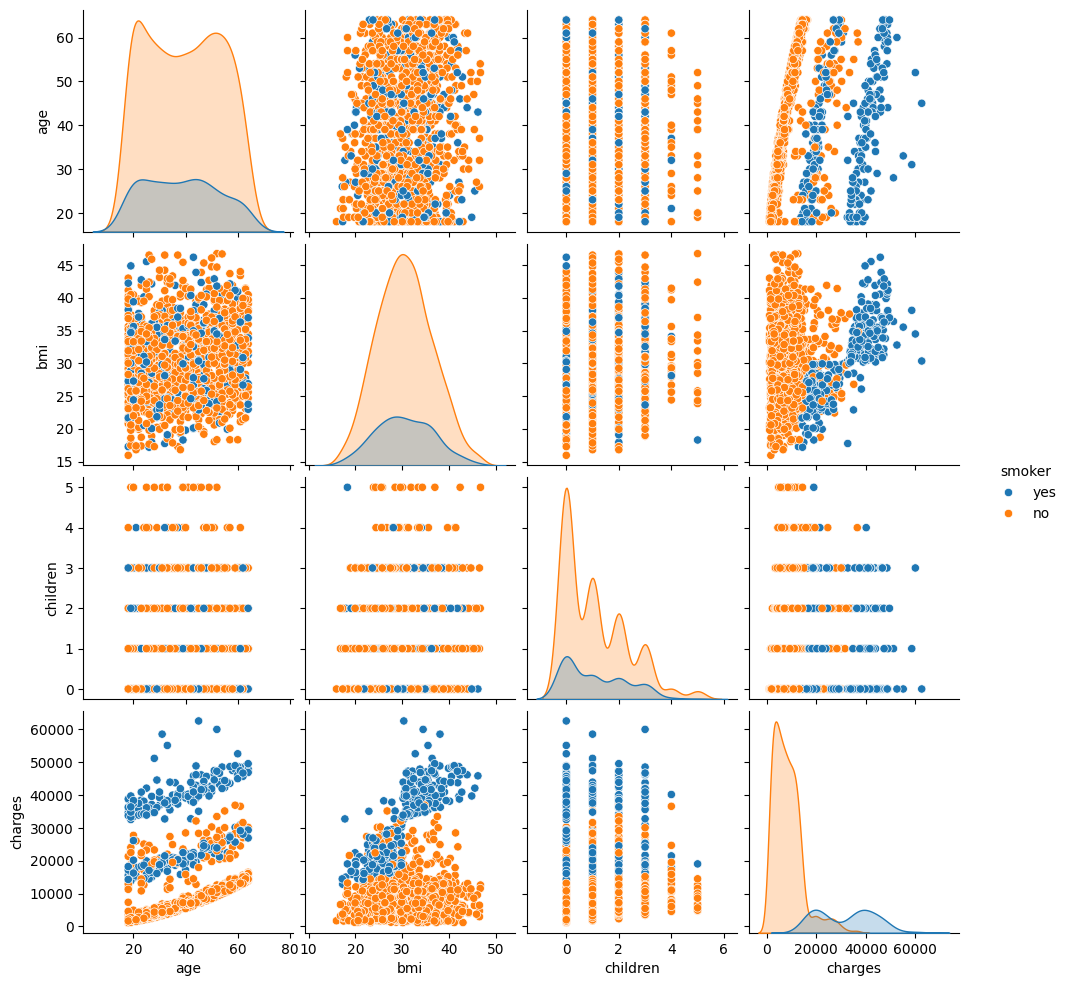

In [15]:
sns.pairplot(df, hue='smoker')
plt.show()

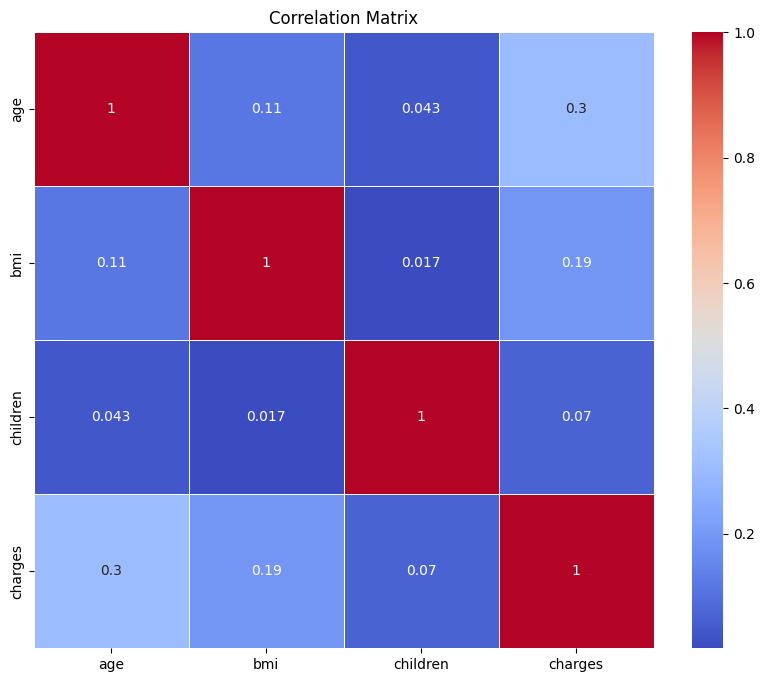

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Pairplot untuk fitur numerik

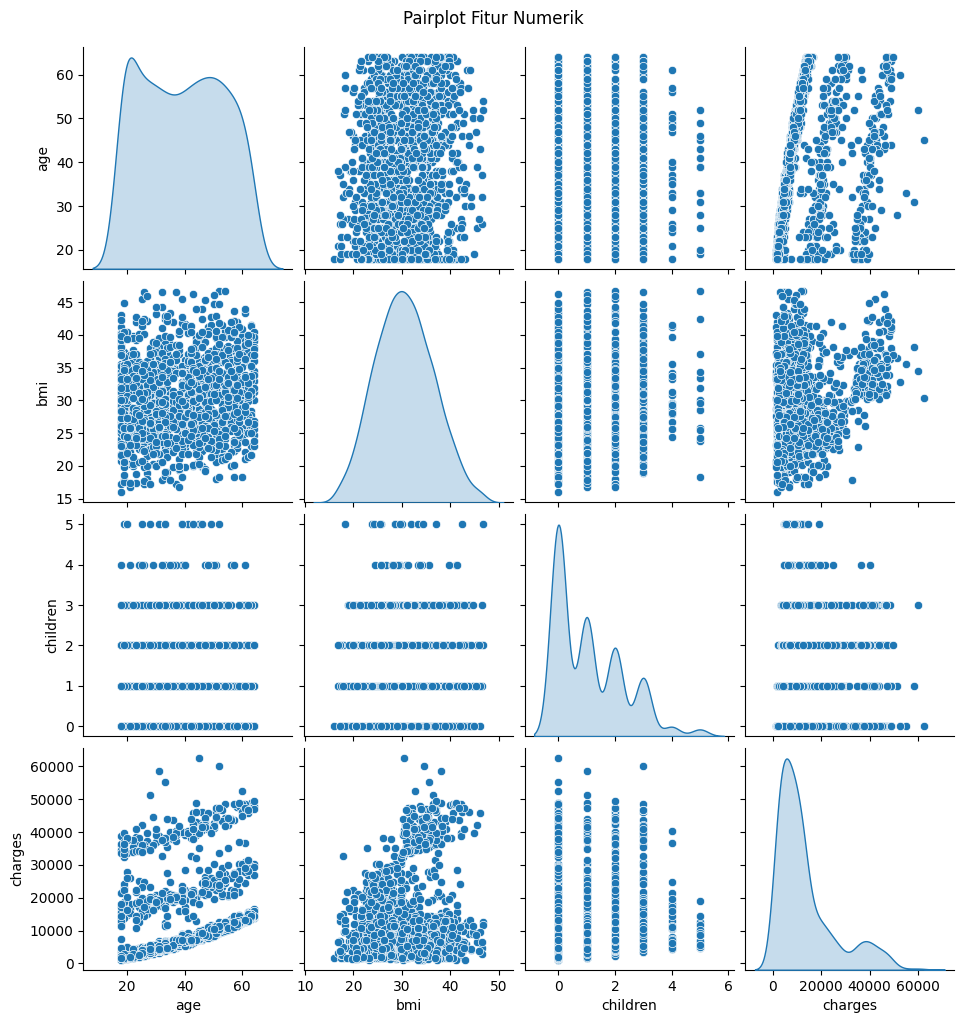

In [17]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot Fitur Numerik", y=1.02)
plt.show()

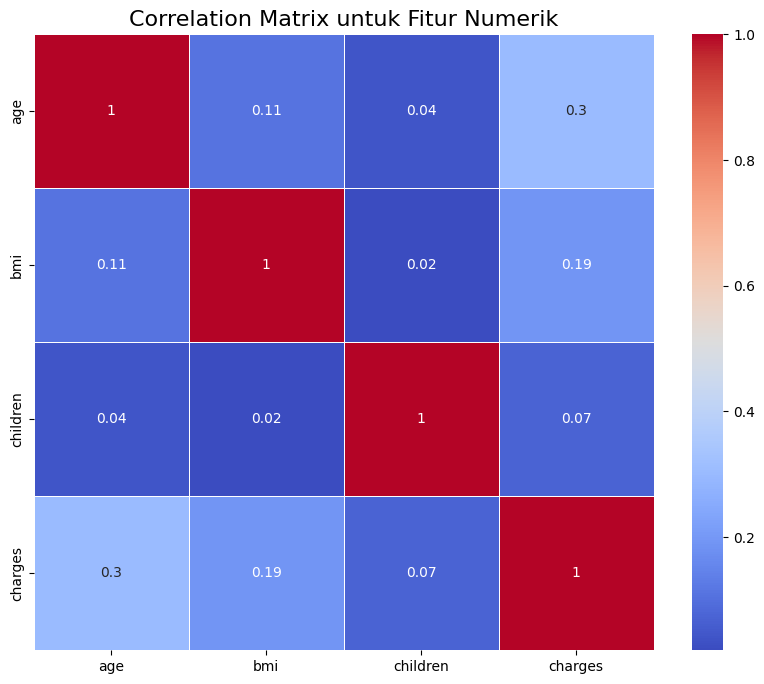

In [18]:
plt.figure(figsize=(10, 8))
numerical_features = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numerical_features].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=16)
plt.show()

**Analisis Korelasi Fitur Numerik terhadap charges**

Analisis korelasi dilakukan untuk mengetahui hubungan antara fitur numerik dengan target `charges`. Hasilnya menunjukkan bahwa:

- `age` memiliki korelasi lemah hingga sedang terhadap `charges` (0.30), sehingga tetap dipertahankan karena masih memberikan kontribusi informasi yang berarti.

- `bmi` dan `children` memiliki korelasi yang sangat lemah terhadap `charges` (masing-masing 0.19 dan 0.07), sehingga keduanya dapat dipertimbangkan untuk dihapus demi menyederhanakan model tanpa mengorbankan performa prediksi secara signifikan.

Penghapusan fitur dilakukan untuk menyederhanakan model dan mengurangi noise dari fitur yang tidak berkontribusi besar terhadap prediksi.

a. Drop fitur dengan korelasi rendah

In [19]:
# Drop fitur numerik dengan korelasi rendah terhadap target 'charges'
df.drop(['bmi', 'children'], axis=1, inplace=True)
print("Fitur 'bmi' dan 'children' dihapus karena korelasi sangat rendah terhadap target 'charges'.")

Fitur 'bmi' dan 'children' dihapus karena korelasi sangat rendah terhadap target 'charges'.


<ipython-input-19-b73585a9dde2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['bmi', 'children'], axis=1, inplace=True)


b. Update fitur numerik untuk scaling

In [20]:
# Feature Scaling hanya untuk 'age' karena 'bmi' dan 'children' sudah dihapus
X = df.drop('charges', axis=1)
y = df['charges']
numerical_features = ['age']  # hanya age tersisa

8. One-Hot Encoding

In [21]:
categorical_features = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

9. Feature Scaling

In [22]:
X = df.drop('charges', axis=1)
y = df['charges']
numerical_features = [col for col in ['age'] if col in X.columns]

10. Train-Test Split

In [23]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

11. Standarisasi fitur numerik

In [24]:
numerical_features = ['age']  # hanya 'age' yang tersisa sebagai fitur numerik
scaler = StandardScaler()

In [25]:
  # Fit hanya pada data latih
  scaler.fit(X_train[numerical_features])

  # Transform pada data latih dan data uji
  X_train[numerical_features] = scaler.transform(X_train[numerical_features])
  X_test[numerical_features] = scaler.transform(X_test[numerical_features])

11. Train Models

KNN

In [26]:
# Siapkan dataframe hasil evaluasi model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [27]:
# Inisialisasi model KNN dengan k = 10 dan metrik Euclidean (default)
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [28]:
# Prediksi data latih
y_train_pred = knn.predict(X_train)

In [29]:
# Simpan hasil MSE data latih ke dataframe models
models.loc['train_mse', 'KNN'] = mean_squared_error(y_train, y_train_pred)

In [30]:
# Lihat hasil sementara
print("Train MSE KNN:", models.loc['train_mse', 'KNN'])

Train MSE KNN: 37385010.35720939


Random Forest

In [31]:
# Buat dan latih model Random Forest
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=50, n_jobs=-1, random_state=55)

In [32]:
# Prediksi pada data latih
y_train_pred_rf = RF.predict(X_train)

In [33]:
# Simpan hasil MSE ke dalam dataframe models
models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_train, y_train_pred_rf)


In [34]:
# Lihat hasil sementara
print("Train MSE Random Forest:", models.loc['train_mse', 'RandomForest'])

Train MSE Random Forest: 18614798.204253025


AdaBoost

In [35]:
# Buat dan latih model AdaBoost
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, random_state=55)

In [36]:
# Prediksi pada data latih
y_train_pred_boost = boosting.predict(X_train)

In [37]:
# Simpan hasil MSE ke dalam dataframe models
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_train, y_train_pred_boost)

In [38]:
# Lihat hasil sementara
print("Train MSE AdaBoost:", models.loc['train_mse', 'Boosting'])

Train MSE AdaBoost: 39826337.6272155


In [39]:
# Scaling data uji (X_test) menggunakan scaler dari data latih
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

12. Evaluasi Model dengan MSE

In [48]:
# Buat dataframe untuk menyimpan nilai MSE
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Dictionary model
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung MSE dan simpan dalam dataframe
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3

# Tampilkan hasil
print(mse)

                 train           test
KNN       37385.010357  114480.023719
RF        18614.798204   89983.530049
Boosting  39826.337627    71642.69622


12. Visualisasi MSE

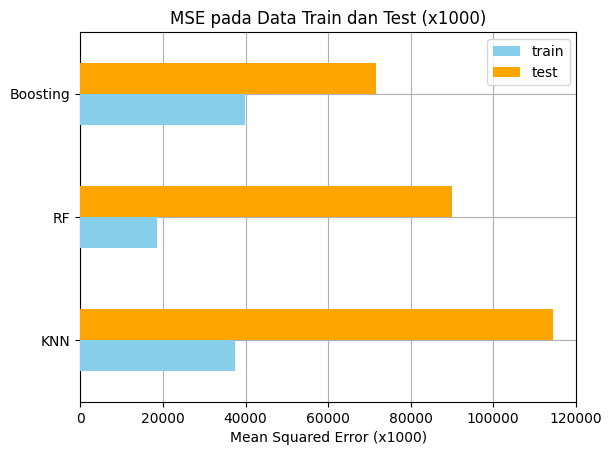

In [41]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3, color=['skyblue', 'orange'])
ax.set_title('MSE pada Data Train dan Test (x1000)')
ax.set_xlabel('Mean Squared Error (x1000)')
ax.grid(zorder=0)
plt.show()

13. Prediksi Data Uji

In [45]:
# Ambil satu baris pertama dari data uji
prediksi = X_test.iloc[:1].copy()

# Simpan hasil prediksi dalam dictionary
pred_dict = {'y_true': y_test[:1].values}
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

# Tampilkan dalam DataFrame
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,2117.33885,6228.1,5802.1,4825.6
